# Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
df = pd.read_csv("CO2data.csv")

# Extract the features and target variable
X = df[['Weight', 'Volume']].values
y = df['CO2'].values

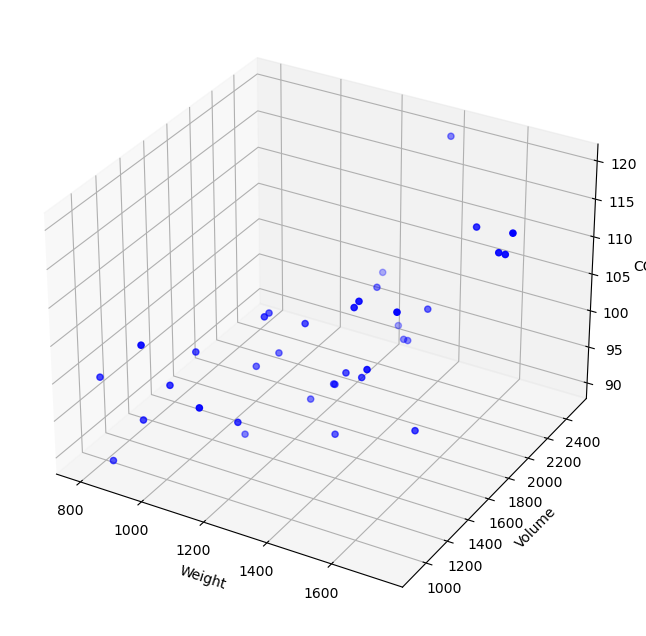

In [2]:
# Visualize the original data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of 'Weight,' 'Volume,' and 'CO2'
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

# Set labels for axes
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

plt.show()

In [3]:
# How well does the features perform individually?

# Create a linear regression model
mdl = LinearRegression()

# Weight
weight_mdl = LinearRegression().fit(X[:,0].reshape(-1,1), y)
y_pred = weight_mdl.predict(X[:,0].reshape(-1,1))
mse = mean_squared_error(y, y_pred)
print('Weight model MSE: ',mse)

# Volume
volume_mdl = LinearRegression().fit(X[:,1].reshape(-1,1), y)
y_pred = volume_mdl.predict(X[:,1].reshape(-1,1))
mse = mean_squared_error(y, y_pred)
print('Volume model MSE: ',mse)

Weight model MSE:  37.55581115956569
Volume model MSE:  35.08725287919057


In [4]:
# Create a linear regression model
mdl = LinearRegression().fit(X, y)

y_pred = mdl.predict(X)
mse = mean_squared_error(y, y_pred)
print('Full model MSE: ',mse)

Full model MSE:  33.68279098995154


In [5]:
# Predict the CO2 emission of car where the weight is 2300kg and the volume is 1300cm3
y_pred = mdl.predict([[2300,1300]])
y_pred

array([107.2087328])

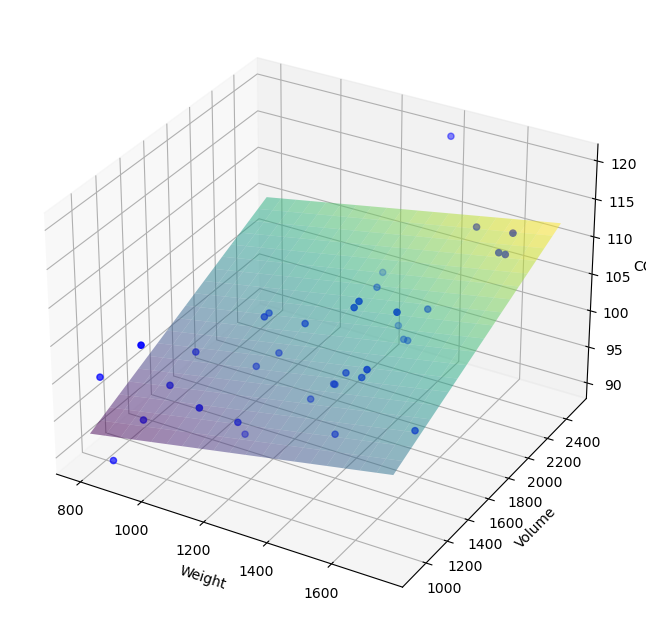

In [6]:
# Visualize the regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Actual Data')

# Create a mesh grid for the plane
x_grid, y_grid = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 20),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 20))
z_grid = mdl.intercept_ + mdl.coef_[0] * x_grid + mdl.coef_[1] * y_grid

# Plot the regression plane
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.5)

# Set labels for axes and a title
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

# Show the plot
plt.show()

# Exercise 2


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("CVDdata.csv")

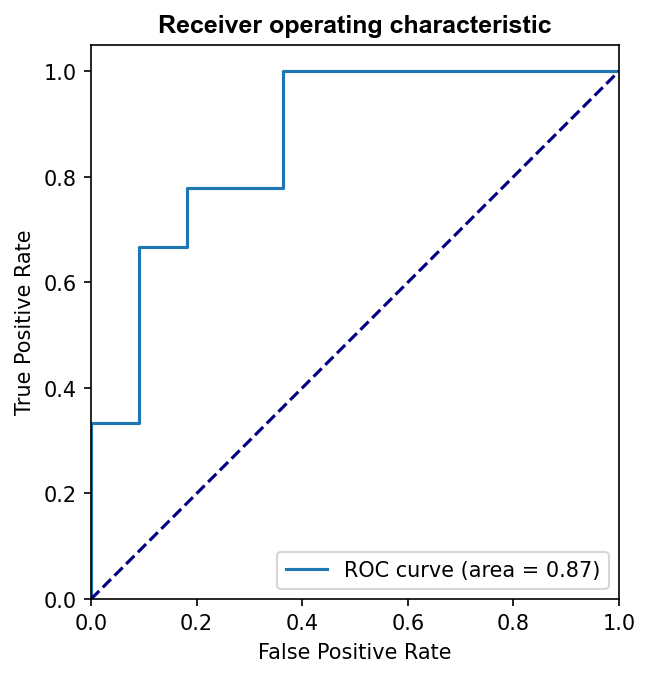

In [8]:
# Define input and target
X = df[['BP']].values # Using only blood pressure
#X = df[['BP','Smoking']].values # Using blood pressure and smoking
y = df['CVD'].values

# Define the model
log = LogisticRegression()

# Fit model
log.fit(X, y)

# Predict probabilities
y_pred = log.predict_log_proba(X)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr,tpr,label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic", fontname='Arial', fontweight='bold')
plt.legend(loc='lower right')
plt.show()

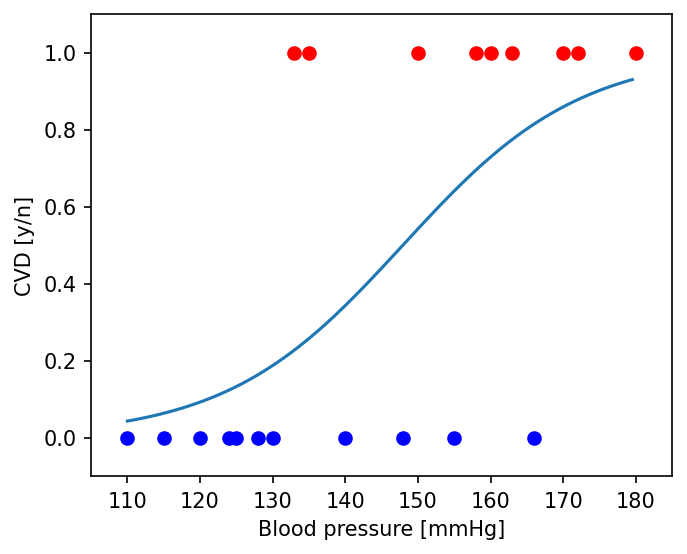

In [9]:
# For visualizing when X = df[['BP']].values
x_arr = np.arange(110,180,0.5)
y_arr = log.predict_proba(x_arr.reshape(-1,1))

# Visualize
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(df['BP'][df['CVD']==0],df['CVD'][df['CVD']==0],zorder=2,color='blue')
plt.scatter(df['BP'][df['CVD']==1],df['CVD'][df['CVD']==1],zorder=2,color='red')
plt.plot(x_arr,y_arr[:,1],zorder=1)
plt.xlabel('Blood pressure [mmHg]')
plt.ylabel('CVD [y/n]')
plt.xlim([105,185])
plt.ylim([-0.1,1.1])
plt.show()

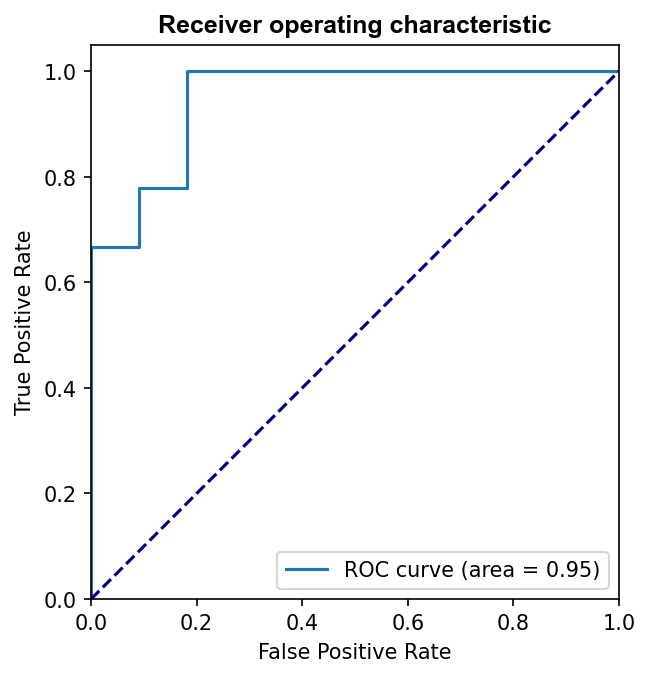

In [10]:
# Same code as before, but now using X = df[['BP','Smoking']].values

# Define input and target
#X = df[['BP']].values # Using only blood pressure
X = df[['BP','Smoking']].values # Using blood pressure and smoking
y = df['CVD'].values

# Define the model
log = LogisticRegression()

# Fit model
log.fit(X, y)

# Predict probabilities
y_pred = log.predict_log_proba(X)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr,tpr,label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic", fontname='Arial', fontweight='bold')
plt.legend(loc='lower right')
plt.show()